In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tease.models.sequential import Sequential
from tease.layers.linear import Linear
from tease.activations.relu import Relu

In [2]:
np.random.seed(42)

In [3]:

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


In [4]:

df_train = pd.DataFrame(X_train, columns=housing.feature_names)
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.5363      44.0  5.064140   1.058309      1184.0  3.451895     33.92   
1  3.2321      40.0  4.280822   1.050228       869.0  1.984018     34.16   
2  4.7885      36.0  5.935275   1.022654       864.0  2.796117     34.21   
3  2.4414      21.0  4.795148   1.075472      1446.0  3.897574     36.86   
4  4.2192      14.0  5.816327   1.054945      3597.0  2.823391     32.74   

   Longitude  
0    -118.25  
1    -118.30  
2    -118.34  
3    -120.51  
4    -116.97  


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [6]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11610, 1)

In [7]:

model = Sequential()
model.add(Linear(X_train.shape[1], 30))
model.add(Relu())
model.add(Linear(30, 10))
model.add(Linear(10, 1))

In [8]:
history = model.train(X_train, y_train, 20, X_valid, y_valid)


epoch number 1

epoch number 2

epoch number 3

epoch number 4

epoch number 5

epoch number 6

epoch number 7

epoch number 8

epoch number 9

epoch number 10

epoch number 11

epoch number 12

epoch number 13

epoch number 14

epoch number 15

epoch number 16

epoch number 17

epoch number 18

epoch number 19

epoch number 20



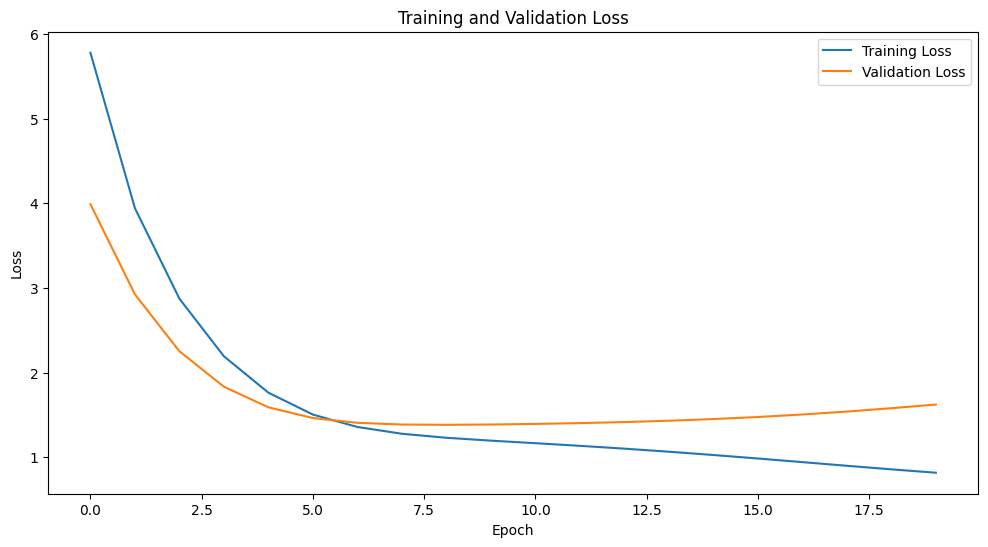

In [9]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
if 'val_loss' in history:
    plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()